<h1>Bitcoin Data Set</h1>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from ydata_profiling import ProfileReport

Since the dataset is large, we are using drive to upload the csv file

In [2]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/Colab/BTC.csv"
df=pd.read_csv(path)
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...,...
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


<h1>Data Cleaning and Preprocessing</h1>

In [5]:
df.reindex(index=df.index[::-1])

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
610781,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
...,...,...,...,...,...,...,...,...,...
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021


In [6]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

<h1>Exploratory Data Analysis</h1>

<ipython-input-7-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

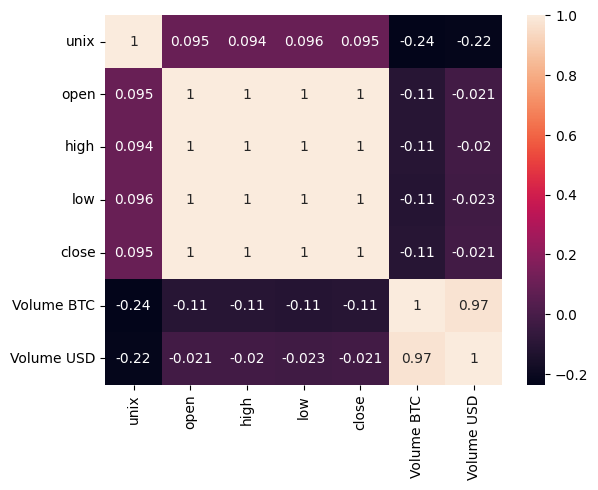

In [7]:
sns.heatmap(df.corr(),annot=True)

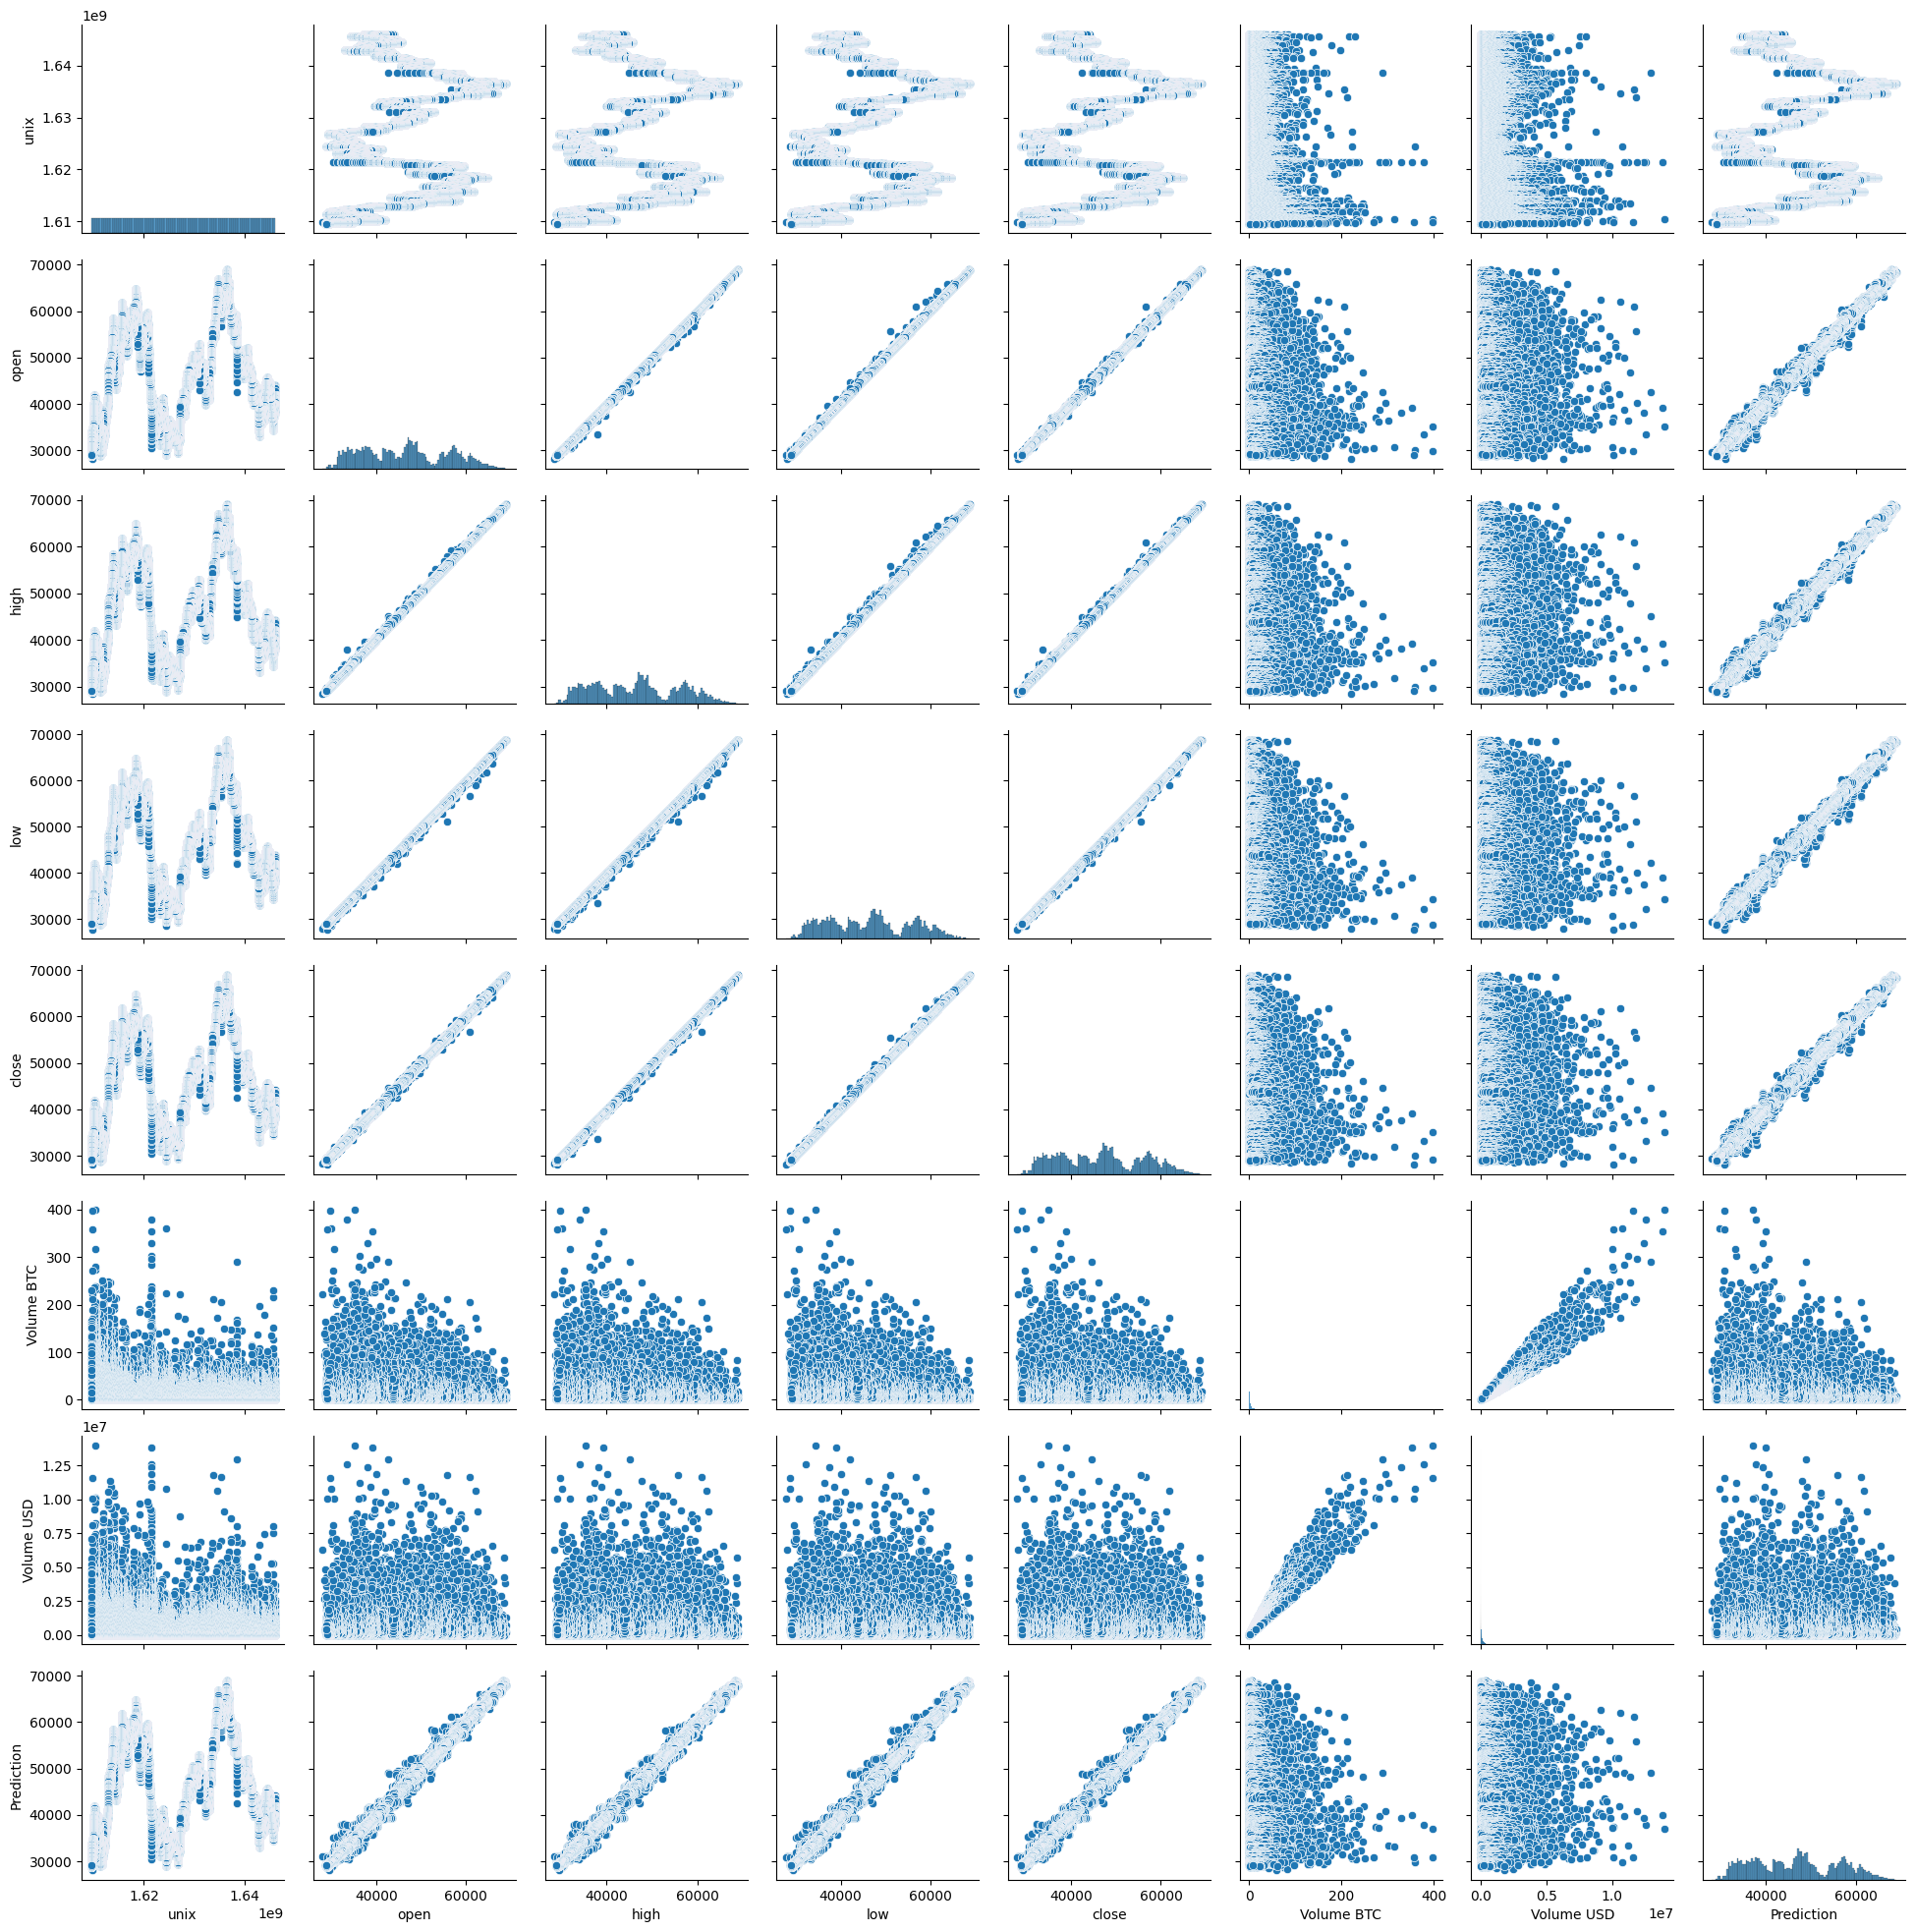

In [22]:
sns.pairplot(df)

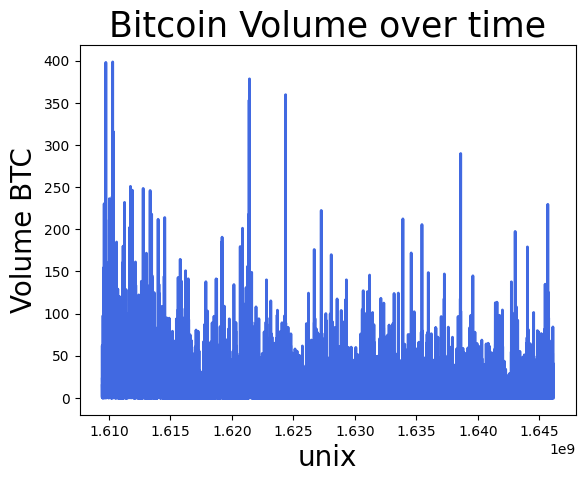

In [23]:
plt.plot(df["unix"], df["Volume BTC"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("unix", size=20)
plt.ylabel("Volume BTC", size=20);

In [9]:
required_features = ['open', 'high', 'low', 'Volume BTC', 'Volume USD']
output_label = 'close'
x_train, x_test, y_train, y_test = train_test_split(df[required_features],df[output_label],test_size = 0.3)

Creating the Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9999931496426223

Predicting the Prices

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math

y_test_pred = model.predict(x_test)
print('Mean Absolute Error: %.2f ' % mean_absolute_error(y_test, y_test_pred))
print('Mean Absolute Error Percentage : %.2f ' % (mean_absolute_percentage_error(y_test, y_test_pred) * 100) + '%')
mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error: %.2f ' % mse)
print('Root Mean Squared Error: %.2f ' % math.sqrt(mse))

Mean Absolute Error: 14.76 
Mean Absolute Error Percentage : 0.03 %
Mean Squared Error: 612.09 
Root Mean Squared Error: 24.74 


Random forest regressor


In [12]:
from sklearn import preprocessing, svm
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...,...
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


In [15]:
forecast_out = int(20)
ndf = df
ndf['Prediction'] = ndf[['close']].shift(-forecast_out)

ndf.drop(['date'], axis=1, inplace = True)
ndf.drop(['symbol'], axis=1, inplace = True)

rand_for_x = np.array(ndf.drop(['Prediction'], 1))
rand_for_x = preprocessing.scale(rand_for_x)


X_forecast = rand_for_x[-forecast_out:]
rand_for_x = rand_for_x[:-forecast_out]

rand_for_y = np.array(ndf['Prediction'])
rand_for_y = rand_for_y[:-forecast_out]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rand_for_x, rand_for_y, test_size = 0.2, random_state=0)
print(X_test_rf.size)
print(y_test_rf.size)

<ipython-input-15-60a1d528c76f>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rand_for_x = np.array(ndf.drop(['Prediction'], 1))


855071
122153


In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_rf, y_train_rf)

# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
#            verbose=0, warm_start=False)

print('Random Forest R squared": %.4f' % forest_reg.score(X_test_rf, y_test_rf))

y_pred = forest_reg.predict(X_test_rf)
forest_mse = mean_squared_error(y_pred, y_test_rf)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

cross_validation = forest_reg.predict(X_test_rf)

confidence = forest_reg.score(X_test_rf, y_test_rf)
print("confidence: ", confidence)

forecast_prediction = forest_reg.predict(X_forecast)
print(forecast_prediction)

Random Forest R squared": 0.9995
Random Forest RMSE: 203.2663
confidence:  0.9995372946673712
[29037.8232 29020.2122 29025.8401 29031.2785 29039.0415 29054.0662
 29057.0035 29041.0709 29002.5016 29021.4446 28998.3072 28991.0586
 28985.6081 28986.6464 28987.7912 28989.5827 28984.3264 28987.2291
 28986.4653 28987.2789]
